In [1]:
import sys
from sys import platform
if platform  == 'win32':
    sys.argv=["_", r"P:\rmahajan14\capstone_data\data", r"P:\rmahajan14\capstone_data\cache"]
if platform == 'linux' or platform == 'linux2':
    def full_path(p):
        return os.path.abspath(os.path.expanduser(p))
    sys.argv=["_", r"/mnt/d/DiDi_Ride_Data/data", r"/mnt/d/DiDi_Ride_Data/Ride_Data_Cache"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [3]:
from loader1 import *
from utils import *
from common import *
from experiment2 import *
# from sys import platform

import warnings
warnings.filterwarnings('ignore')

In [4]:
import time

Basic Coding 

In [5]:
spatial_type = 'radial'
combine_pool = True

In [14]:
df_final_no_decay, target_df_no_decay = get_final_df_reg(use_cache=True, decay='No Decay', 
                                                         spatial_type=spatial_type, combine_pool=combine_pool)

../Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
No Decay
Dumping to ../Ride_Data_Cache/active_times_pool_True.msgpack
Decay Calculation done in 157.94339108467102
1e
../Ride_Data_Cache/features_orders.msgpack exists
Features created in 0.7697837352752686
1f
../Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 3.53960919380188


In [15]:
df_final_old_decay, target_df_old_decay = get_final_df_reg(use_cache=True, decay='Old Decay',
                                                           spatial_type=spatial_type,combine_pool=combine_pool)

../Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
Old Decay
Creating the exponential decay
Dumping to ../Ride_Data_Cache/idle_times_old_pool_True.msgpack
Decay Calculation done in 80.89270806312561
1e
../Ride_Data_Cache/features_orders.msgpack exists
Features created in 0.7354192733764648
1f
../Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 3.5862350463867188


In [16]:
# Using the function create_modified_active_time_through_decay2 
# instead of create_modified_active_time_through_decay
df_final_new_decay1, target_df_new_decay1 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=1, spatial_type=spatial_type, combine_pool=combine_pool)
df_final_new_decay10, target_df_new_decay10 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=10, spatial_type=spatial_type, combine_pool=combine_pool)
df_final_new_decay100, target_df_new_decay100 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=100, spatial_type=spatial_type, combine_pool=combine_pool)

../Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
New Decay
Creating the exponential decay
Dumping to ../Ride_Data_Cache/idle_times_new_1_pool_True.msgpack
Decay Calculation done in 83.97497582435608
1e
../Ride_Data_Cache/features_orders.msgpack exists
Features created in 0.8196830749511719
1f
../Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 4.19228196144104
../Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
New Decay
Creating the exponential decay
Dumping to ../Ride_Data_Cache/idle_times_new_10_pool_True.msgpack
Decay Calculation done in 86.13810801506042
1e
../Ride_Data_Cache/features_orders.msgpack exists
Features created in 0.7940101623535156
1f
../Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 4.480083227157593
../Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
New Decay
Creating the exponential decay
Dumping to ../Ride_Data_Cache/idle_tim

In [ ]:
# new_df = df_final_new_decay100[df_final_new_decay100['num_pool_rides'] == 0]

In [19]:
target_df_new_decay10.head(2)

,driver_id,ride_duration,modified_active_time,inactive_time,target
0,0000131d486b69eb77ab6e9e7cca9f4c,75.583333,98.127329,6.922671,0.770258
1,00002724a19c5f6a54ae8d60a378997e,34.800000,34.800000,0.000000,1.000000


In [ ]:
# df_final_new_decay100.sort_values('num_pool_rides', ascending=False).head(5)

In [ ]:
# start = '2016-11-01'
# end = '2016-11-30'
# orders = merge_order_df(start=start, end=end, use_cache=True)

In [ ]:

# orders[['ride_start_timestamp', 'ride_stop_timestamp']][orders.driver_id == '3d5914545a97b002450e7769d7e51df3'].sort_values('ride_start_timestamp')

In [ ]:
# new_target_df = target_df_new_decay100[target_df_new_decay100.driver_id.isin(list(new_df.index))]

In [ ]:
# new_target_df.head(2)

In [ ]:
# new_df.head(2)

In [ ]:
# new_target_df.shape, new_df.shape

In [ ]:
# new_target_df[new_target_df.target > 1].shape

In [20]:
# Using the function create_modified_active_time_through_decay2 
# instead of create_modified_active_time_through_decay
df_final_new_decay_surv, target_df_new_decay_surv = get_final_df_reg(use_cache=True, decay='Survival', 
                                                                     spatial_type=spatial_type, combine_pool=combine_pool)

../Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
Survival
Creating the Survival Functions
Dumping to ../Ride_Data_Cache/survival_probability_df_pool_True.msgpack
Decay Calculation done in 88.94033575057983
1e
../Ride_Data_Cache/features_orders.msgpack exists
Features created in 0.7728550434112549
1f
../Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 3.93611478805542


In [21]:
df_list = [df_final_no_decay, df_final_old_decay, df_final_new_decay1, 
           df_final_new_decay10, df_final_new_decay100, df_final_new_decay_surv]
target_df_list = [target_df_no_decay, target_df_old_decay, target_df_new_decay1, 
                  target_df_new_decay10, target_df_new_decay100, target_df_new_decay_surv]
name_list = ['no_decay', 'old_decay', 'new_decay1', 'new_decay10', 'new_decay100', 'survival']

In [22]:
for name, target in zip(name_list, target_df_list):
    print(name, 100*target[target.target > 1].shape[0]/target.shape[0])

no_decay 3.5576097576669925
old_decay 1.668103178218308
new_decay1 1.7314338643063851
new_decay10 2.6098508003542453
new_decay100 3.1153109553620264
survival 0.0


Now to debug why greater than 0%

In [ ]:
# start = '2016-11-01'
# end = '2016-11-30'
# orders = merge_order_df(start=start, end=end, use_cache=True)

In [ ]:
# tmp = orders[['driver_id', 'ride_start_timestamp', 'ride_stop_timestamp', 'ride_duration']][orders.driver_id == '0001860739024029fa3da2cad0ed4de2']

In [ ]:
# tmp['ride_duration'].sum()

In [ ]:
# tmp.sort_values('ride_start_timestamp').head(10)

In [ ]:
# actual_ride_duration = 53 + 32 + 31 + 58 + 48 + 27 + 22
# actual_ride_duration

In [ ]:
# Printing results for 0001860739024029fa3da2cad0ed4de2

# target_df = create_modified_active_time_through_decay2(orders, use_cache=False, save_file=False, mult_factor=100)

We can see that ride duration is summed 3 times which have overlapping periods due to which it becomes greater than 1. Also as you can see above, the actual inactive time in row 33721 should be 28 but we make it 95 which cuts 60 minutes from the drives active time further increasing the error

In [ ]:
# target_df[target_df.ride_duration > target_df.modified_active_time].head(10)

In [ ]:
# val = ['0001860739024029fa3da2cad0ed4de2', '000211a97ba2b768ef941593bf1ae1a5', '0009cc512604d27cc3e819ab6b954fca', '3d5914545a97b002450e7769d7e51df3']

In [ ]:
# order_filter = orders[orders.driver_id.isin(val)]

In [ ]:
# order_filter.head(10)

Now to see those who are active for more than 20 hours 

In [ ]:
# target_df.sort_values('modified_active_time', ascending=False).head(5)

In [ ]:
# Printing results for d18747ec3c039917014c1b397b528d97

# target_df_new = create_modified_active_time_through_decay2(orders, use_cache=False, save_file=False, mult_factor=100)

In [ ]:



# orders[['ride_start_timestamp', 'ride_stop_timestamp', 'ride_duration']][orders.driver_id == 'd18747ec3c039917014c1b397b528d97'].sort_values('ride_start_timestamp')

In essence we are always saying a driver will be active between rides for 10 minutes at least 

### Modelling Code 

We have till now coded the following models 

1. Linear Regression 
2. Linear Regression with L1 Regularization
3. Linear Regression with L2 Regularization
4. Random Forest Regressor 

Now we split the data in a ratio of 75:25

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [24]:
def build_model(df, target_df, name, seed=0):
    # regression forest
    print(f'building regression model for {name}')
    X = df    
    xtrain, xtest, ytrain, ytest = train_test_split(X, target_df['target'], random_state=seed)

    sc = StandardScaler()

    xtrain_sc = sc.fit_transform(xtrain)

    rr = RandomForestRegressor(random_state=seed)
    rr.fit(xtrain_sc, ytrain)

    xtest_sc = sc.transform(xtest)
    
    print(rr.score(xtest_sc, ytest))
    
    return rr, rr.score(xtest_sc, ytest)

In [ ]:
# df_final_new_decay_surv.shape, target_df_new_decay_surv.shape
# df_final_no_decay.shape, target_df_no_decay.shape

In [25]:
df_list = [df_final_no_decay, df_final_old_decay, df_final_new_decay1, 
           df_final_new_decay10, df_final_new_decay100, df_final_new_decay_surv]
target_df_list = [target_df_no_decay, target_df_old_decay, target_df_new_decay1, 
                  target_df_new_decay10, target_df_new_decay100, target_df_new_decay_surv]
name_list = ['no_decay', 'old_decay', 'new_decay1', 'new_decay10', 'new_decay100', 'survival']

In [ ]:
# df_list = [new_df]
# target_df_list = [new_target_df]
# name_list = ['No_Pool']

In [26]:
result = {}
model = {}
for df, target_df, name in zip(df_list, target_df_list, name_list):
    model[name], result[name] = build_model(df, target_df, name)

building regression model for no_decay
0.48343639417427986
building regression model for old_decay
0.6722583950028619
building regression model for new_decay1
0.6636007411090458
building regression model for new_decay10
0.7451740088638229
building regression model for new_decay100
0.7831783074492021
building regression model for survival
0.8868303495124121


In [ ]:
# df_list = [df_final_new_decay100]
# target_df_list = [target_df_new_decay100]
# name_list = ['Decay100']

In [ ]:
# for df, target_df, name in zip(df_list, target_df_list, name_list):
#     model[name], result[name] = build_model(df, target_df, name)

In [ ]:
# result

In [27]:
result

{'no_decay': 0.48343639417427986,
 'old_decay': 0.6722583950028619,
 'new_decay1': 0.6636007411090458,
 'new_decay10': 0.7451740088638229,
 'new_decay100': 0.7831783074492021,
 'survival': 0.8868303495124121}

In [ ]:
# list(new_df.columns)

Feature ranking:
1. feature 111 (0.403077)
2. feature 2 (0.275223)
3. feature 0 (0.116423)
4. feature 3 (0.009938)
5. feature 10 (0.009307)
6. feature 9 (0.008606)
7. feature 7 (0.007390)
8. feature 8 (0.006858)
9. feature 101 (0.006047)
10. feature 104 (0.003481)
11. feature 105 (0.003107)
12. feature 110 (0.002966)
13. feature 106 (0.002801)
14. feature 5 (0.002767)
15. feature 57 (0.002407)
16. feature 84 (0.002325)
17. feature 6 (0.002299)
18. feature 88 (0.002236)
19. feature 12 (0.002235)
20. feature 81 (0.002199)
21. feature 109 (0.002182)
22. feature 49 (0.002140)
23. feature 4 (0.002110)
24. feature 39 (0.002103)
25. feature 80 (0.002094)
26. feature 94 (0.002093)
27. feature 47 (0.001959)
28. feature 78 (0.001942)
29. feature 69 (0.001934)
30. feature 92 (0.001929)
31. feature 79 (0.001872)
32. feature 23 (0.001837)
33. feature 53 (0.001816)
34. feature 90 (0.001796)
35. feature 26 (0.001793)
36. feature 35 (0.001716)
37. feature 91 (0.001702)
38. feature 86 (0.001696)
39. fe

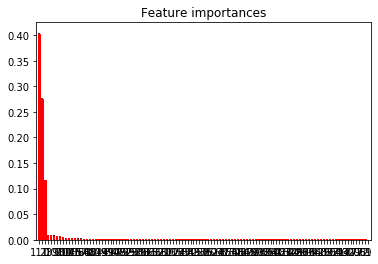

In [29]:
forest = model['new_decay100']
X = df_final_new_decay100
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 0 (0.872962)
2. feature 111 (0.021058)
3. feature 2 (0.012496)
4. feature 9 (0.005070)
5. feature 8 (0.004108)
6. feature 7 (0.003399)
7. feature 10 (0.002985)
8. feature 5 (0.001560)
9. feature 101 (0.001542)
10. feature 4 (0.001450)
11. feature 12 (0.001205)
12. feature 57 (0.001197)
13. feature 88 (0.001121)
14. feature 94 (0.001120)
15. feature 49 (0.001111)
16. feature 80 (0.001094)
17. feature 39 (0.001053)
18. feature 92 (0.001009)
19. feature 26 (0.000994)
20. feature 79 (0.000987)
21. feature 23 (0.000972)
22. feature 78 (0.000969)
23. feature 1 (0.000957)
24. feature 47 (0.000949)
25. feature 35 (0.000941)
26. feature 53 (0.000934)
27. feature 90 (0.000930)
28. feature 16 (0.000917)
29. feature 3 (0.000917)
30. feature 91 (0.000908)
31. feature 104 (0.000902)
32. feature 22 (0.000872)
33. feature 25 (0.000864)
34. feature 33 (0.000862)
35. feature 11 (0.000859)
36. feature 110 (0.000855)
37. feature 6 (0.000849)
38. feature 67 (0.000848)
39. featur

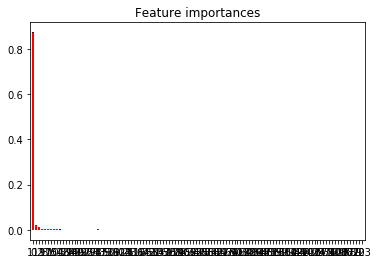

In [31]:
forest = model['survival']
X = df_final_new_decay_surv
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [32]:
target_df_new_decay100[target_df_new_decay100.target > 1].head(2)

,driver_id,ride_duration,modified_active_time,inactive_time,target
14,0000dbe2f9b7a09864e39eb56a415726,538.916667,528.172057,119.711276,1.020343
22,0001860739024029fa3da2cad0ed4de2,337.833333,246.726882,596.006451,1.369260


In [ ]:
# col = [x.shape[1] for x in df_list]
# col

In [ ]:
# set(df_list[1].columns).difference(df_list[0].columns)

In [ ]:
# df_final_old_decay.head()

In [ ]:
# df_final_new_decay10.head()